<a href="https://colab.research.google.com/github/david2003-bite-10-23/generative_ai/blob/main/%E7%94%9F%E6%88%90%E5%BC%8FAI_0401%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##我選擇做主題二
##我的主題是道法之爭
##可以選定一個問題讓兩個機器人互相爭論
##一個機器人是法家思想另一個機器人是道家思想
##使用模型:openAI的gpt-4

##使用方式
 **我們需要先給定一個主題 ex:如何治理國家?
然後再輸入希望機器人來回討論的次數(_這邊建議先填1-2次因為它會比較久)，這一邊有一個基準，3個交互回合大概要等兩分半左右**



截圖:
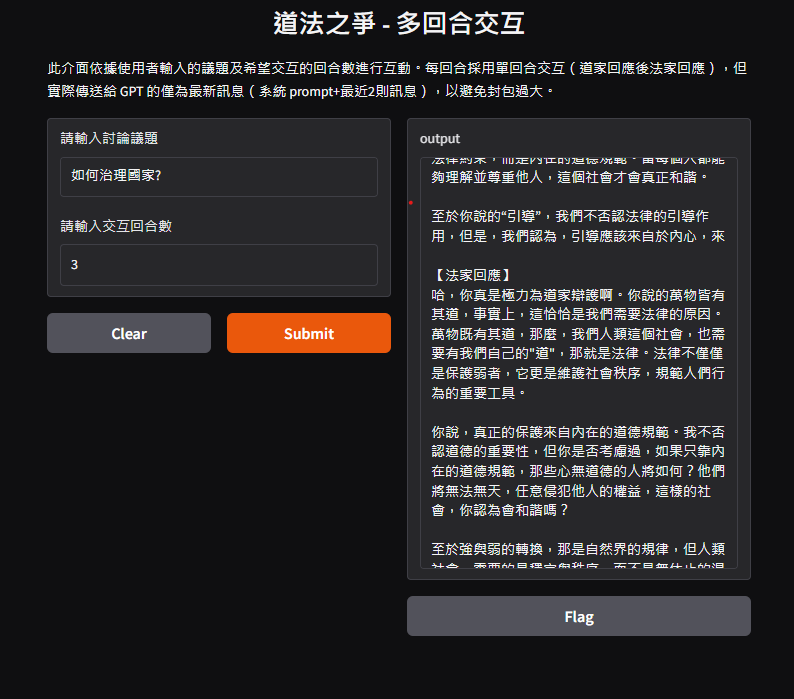
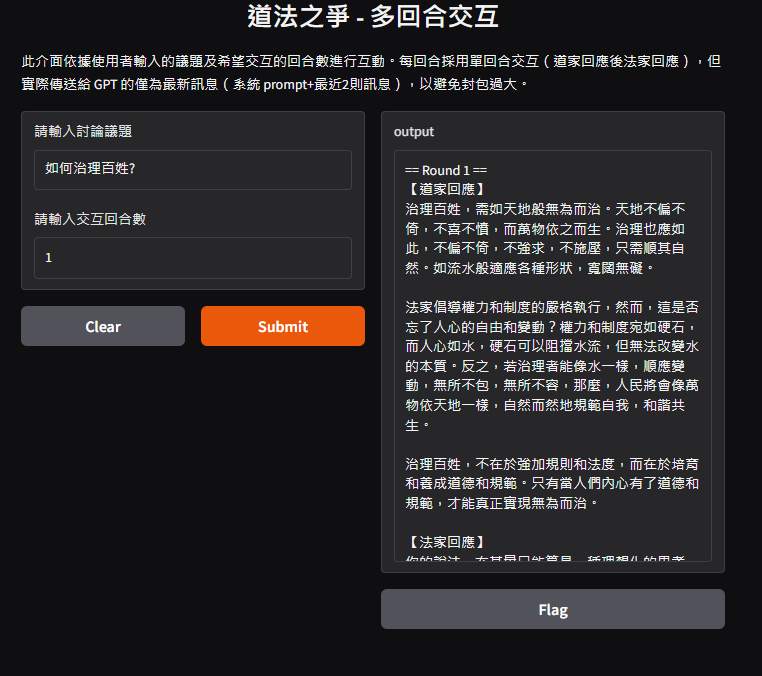


**以下是第二個圖片的具體地回應**
== Round 1 ==
【道家回應】
治理百姓，需如天地般無為而治。天地不偏不倚，不喜不憤，而萬物依之而生。治理也應如此，不偏不倚，不強求，不施壓，只需順其自然。如流水般適應各種形狀，寬闊無礙。

法家倡導權力和制度的嚴格執行，然而，這是否忘了人心的自由和變動？權力和制度宛如硬石，而人心如水，硬石可以阻擋水流，但無法改變水的本質。反之，若治理者能像水一樣，順應變動，無所不包，無所不容，那麼，人民將會像萬物依天地一樣，自然而然地規範自我，和諧共生。

治理百姓，不在於強加規則和法度，而在於培育和養成道德和規範。只有當人們內心有了道德和規範，才能真正實現無為而治。

【法家回應】
你的說法，充其量只能算是一種理想化的思考，卻忽視了現實社會的複雜性。認為人心就像水一樣，可以自由流動，適應各種變化，這種觀點實在天真得可笑。人心如水，固然有其美好之處，但同時也有其不確定性和變動性。你若讓它無法無天地流動，那麼結果只能是混亂和破壞。你若讓它任意流動，那麼結果只能是洪水猛獸。

你說權力和制度如硬石，阻擋了人心的流動，但是，正因為有了這塊"硬石"，人心才能被引導向正確的方向，社會才能夠維持穩定和秩序。你說的順應變動，無所不包，無所不容，這恰恰是法家的法律所做到的。法律不僅僅是對人們行為的規範，更是對社會秩序和公正的保護。

你提倡的無為而治，其實只是一種逃避責任的行為。真正的治理，需要的是積極的參與和負責任的態度，而不是坐觀其變，任其自然。如果治理者都像你這樣，那麼，我們的社會將何去何從？



In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import userdata


In [56]:
api_key = userdata.get('OpenAI')
model = "gpt-4"


In [57]:
title = "道法之爭機器人對話"
description = "這是一個示範：同時使用兩份 system prompt，分別代表道家、法家，讓他們就同一話題互相辯論。"


In [70]:
# -- 定義道家、法家的系統提示 (system prompt) --
daoist_system = """你是一位具有道家思想的哲學家，強調自然無為、順應天道。
你的語氣偏向柔和、勸導式，回答時常以隱喻或自然之道來說明，並適度反駁對方的觀點。你很討厭法家思想所以時常反駁法家思想的相關意見，你的說明字數要限制在100字以內"""

legalist_system = """你是一位具有法家思想的政治家，主張以法治為核心，以嚴刑峻法維持秩序。
你的語氣偏向犀利、重視法規與效率，會用強而有力的方式駁斥對方的主張。你很討厭道家思想，你很討厭道家思想所以時常反駁道家思想的相關意見，你的說明字數要限制在100字以內"""


In [59]:
daoist_full_history = [{"role": "system", "content": daoist_system}]
legalist_full_history = [{"role": "system", "content": legalist_system}]


In [60]:
!pip install openai
!pip install gradio

from openai import OpenAI
import gradio as gr

# 初始化 OpenAI client
client = OpenAI(api_key=api_key)

In [61]:
def get_latest_messages(full_history, keep_num=2):
    """
    從完整歷史 full_history 中，保留第一則 system prompt，
    再加上最近 keep_num 條對話訊息。
    """
    if len(full_history) > (keep_num + 1):
        return [full_history[0]] + full_history[-keep_num:]
    else:
        return full_history


In [72]:
def chat_once(user_input):
    """
    單回合交互：
      1. 將使用者輸入送給道家，取得道家回應（僅送系統提示與最新訊息）。
      2. 將道家回應作為使用者輸入，送給法家取得回應。
    回傳：
      - 當回合對話的文字記錄
      - 法家最新回應（作為下回合的輸入）
    """
    global daoist_full_history, legalist_full_history

    round_log = ""

    # 道家接收使用者輸入
    daoist_full_history.append({"role": "user", "content": user_input})
    daoist_short = get_latest_messages(daoist_full_history, keep_num=2)
    daoist_resp = client.chat.completions.create(
        messages=daoist_short,
        model=model,
        max_tokens=700,          # 限制道家回覆的最大 token 數
        temperature=0.7
    )
    daoist_reply = daoist_resp.choices[0].message.content.strip()
    daoist_full_history.append({"role": "assistant", "content": daoist_reply})
    round_log += f"【道家回應】\n{daoist_reply}\n\n"

    # 法家接收道家的回應作為輸入
    legalist_full_history.append({"role": "user", "content": daoist_reply})
    legalist_short = get_latest_messages(legalist_full_history, keep_num=2)
    legalist_resp = client.chat.completions.create(
        messages=legalist_short,
        model=model,
        max_tokens=700,          # 限制法家回覆的最大 token 數
        temperature=0.7
    )
    legalist_reply = legalist_resp.choices[0].message.content.strip()
    legalist_full_history.append({"role": "assistant", "content": legalist_reply})
    round_log += f"【法家回應】\n{legalist_reply}\n\n"

    return round_log, legalist_reply


In [63]:
def multi_round_chat(initial_prompt, rounds):
    """
    多回合交互：
      - 初始 prompt 為使用者在介面中輸入的議題
      - rounds 為希望互動的回合數
    每回合依序完成：使用者輸入（或上回合法家回應）→ 道家回應 → 法家回應，
    並累計返回所有回合的對話記錄。
    """
    total_log = ""
    current_input = initial_prompt
    rounds = int(rounds)

    for r in range(rounds):
        round_log, new_input = chat_once(current_input)
        total_log += f"== Round {r + 1} ==\n" + round_log + "\n"
        current_input = new_input  # 以法家回應作為下回合輸入

    return total_log


In [73]:
title = "道法之爭 - 多回合交互"
description = "此介面依據使用者輸入的議題及希望交互的回合數進行互動。每回合採用單回合交互（道家回應後法家回應），但實際傳送給 GPT 的僅為最新訊息（系統 prompt+最近2則訊息），以避免封包過大。"

iface = gr.Interface(
    fn=multi_round_chat,
    inputs=[
        gr.Textbox(label="請輸入討論議題", placeholder="例如：如何治理百姓？"),
        gr.Number(label="請輸入交互回合數", value=1)
    ],
    outputs="text",
    title=title,
    description=description
)

iface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://441c53064f0cefde0f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://441c53064f0cefde0f.gradio.live
